In [576]:
import pandas as pd
import numpy as np

import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, root_mean_squared_error, mean_squared_error
from sklearn.linear_model import ElasticNet


import matplotlib.pyplot as plt

pd.set_option('display.max_colwidth', 1000)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.display.max_columns = 1000
pd.set_option('future.no_silent_downcasting', True)

path = "https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/cars.csv"

In [577]:
df = pd.read_csv(path)

df

,name,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,2014,"5,75,000","36,000 kms",Diesel
...,...,...,...,...,...
887,Ta,zest,"3,10,000",NaN,NaN
888,Tata Zest XM Diesel,2018,"2,60,000","27,000 kms",Diesel
889,Mahindra Quanto C8,2013,"3,90,000","40,000 kms",Diesel
890,Honda Amaze 1.2 E i VTEC,2014,"1,80,000",Petrol,NaN


In [578]:
df = df[df['Price'] != 'Ask For Price']
df

,name,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,2006,"4,25,000",40 kms,Diesel
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,2014,"5,75,000","36,000 kms",Diesel
6,Ford Figo,2012,"1,75,000","41,000 kms",Diesel
...,...,...,...,...,...
887,Ta,zest,"3,10,000",NaN,NaN
888,Tata Zest XM Diesel,2018,"2,60,000","27,000 kms",Diesel
889,Mahindra Quanto C8,2013,"3,90,000","40,000 kms",Diesel
890,Honda Amaze 1.2 E i VTEC,2014,"1,80,000",Petrol,NaN


In [579]:
df['Price'].unique()

array(['80,000', '4,25,000', '3,25,000', '5,75,000', '1,75,000',
       '1,90,000', '8,30,000', '2,50,000', '1,82,000', '3,15,000',
       '4,15,000', '3,20,000', '10,00,000', '5,00,000', '3,50,000',
       '1,60,000', '3,10,000', '75,000', '1,00,000', '2,90,000', '95,000',
       '1,80,000', '3,85,000', '1,05,000', '6,50,000', '6,89,999',
       '4,48,000', '5,49,000', '5,01,000', '4,89,999', '2,80,000',
       '3,49,999', '2,84,999', '3,45,000', '4,99,999', '2,35,000',
       '2,49,999', '14,75,000', '3,95,000', '2,20,000', '1,70,000',
       '85,000', '2,00,000', '5,70,000', '1,10,000', '4,48,999',
       '18,91,111', '1,59,500', '3,44,999', '4,49,999', '8,65,000',
       '6,99,000', '3,75,000', '2,24,999', '12,00,000', '1,95,000',
       '3,51,000', '2,40,000', '90,000', '1,55,000', '6,00,000',
       '1,89,500', '2,10,000', '3,90,000', '1,35,000', '16,00,000',
       '7,01,000', '2,65,000', '5,25,000', '3,72,000', '6,35,000',
       '5,50,000', '4,85,000', '3,29,500', '2,51,111', 

In [580]:
df['Price'] = df['Price'].map(lambda x: x.replace(",", "")[:-2])
df

C:\Users\Grand\AppData\Local\Temp\ipykernel_5292\1093165330.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price'] = df['Price'].map(lambda x: x.replace(",", "")[:-2])


,name,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,2007,800,"45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,2006,4250,40 kms,Diesel
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,2014,3250,"28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,2014,5750,"36,000 kms",Diesel
6,Ford Figo,2012,1750,"41,000 kms",Diesel
...,...,...,...,...,...
887,Ta,zest,3100,NaN,NaN
888,Tata Zest XM Diesel,2018,2600,"27,000 kms",Diesel
889,Mahindra Quanto C8,2013,3900,"40,000 kms",Diesel
890,Honda Amaze 1.2 E i VTEC,2014,1800,Petrol,NaN


In [581]:
df['kms_driven'] [df['kms_driven'] == 'Petrol']

890    Petrol
891    Petrol
Name: kms_driven, dtype: object

In [582]:
mask = df['kms_driven'] == 'Petrol'

df.loc[mask, 'fuel_type'] = df.loc[mask, 'kms_driven']

df.loc[mask, 'kms_driven'] = np.nan

df

,name,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,2007,800,"45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,2006,4250,40 kms,Diesel
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,2014,3250,"28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,2014,5750,"36,000 kms",Diesel
6,Ford Figo,2012,1750,"41,000 kms",Diesel
...,...,...,...,...,...
887,Ta,zest,3100,NaN,NaN
888,Tata Zest XM Diesel,2018,2600,"27,000 kms",Diesel
889,Mahindra Quanto C8,2013,3900,"40,000 kms",Diesel
890,Honda Amaze 1.2 E i VTEC,2014,1800,NaN,Petrol


In [583]:
df = df[df['fuel_type'].isna() != True]
df = df[df['kms_driven'].isna() != True]

In [584]:
df['fuel_type'].isna().value_counts()

fuel_type
False    816
Name: count, dtype: int64

In [585]:
df = df.reset_index(drop=True)

df

,name,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,2007,800,"45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,2006,4250,40 kms,Diesel
2,Hyundai Grand i10 Magna 1.2 Kappa VTVT,2014,3250,"28,000 kms",Petrol
3,Ford EcoSport Titanium 1.5L TDCi,2014,5750,"36,000 kms",Diesel
4,Ford Figo,2012,1750,"41,000 kms",Diesel
...,...,...,...,...,...
811,Maruti Suzuki Ritz VXI ABS,2011,2700,"50,000 kms",Petrol
812,Tata Indica V2 DLE BS III,2009,1100,"30,000 kms",Diesel
813,Toyota Corolla Altis,2009,3000,"1,32,000 kms",Petrol
814,Tata Zest XM Diesel,2018,2600,"27,000 kms",Diesel


In [586]:
df['kms_driven'] = df['kms_driven'].astype(str)

In [587]:
df['kms_driven'] = df['kms_driven'].map(lambda x: x.replace(",", "").replace(" kms", ""))
df['kms_driven']

0       45000
1          40
2       28000
3       36000
4       41000
        ...  
811     50000
812     30000
813    132000
814     27000
815     40000
Name: kms_driven, Length: 816, dtype: object

In [588]:
df['year'] = pd.to_numeric(df['year'])
df['Price'] = pd.to_numeric(df['Price'])
df['kms_driven'] = pd.to_numeric(df['kms_driven'])

In [589]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   year        816 non-null    int64 
 2   Price       816 non-null    int64 
 3   kms_driven  816 non-null    int64 
 4   fuel_type   816 non-null    object
dtypes: int64(3), object(2)
memory usage: 32.0+ KB


In [590]:
df = df[df['kms_driven'].isna() != True]
df

,name,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,2007,800,45000,Petrol
1,Mahindra Jeep CL550 MDI,2006,4250,40,Diesel
2,Hyundai Grand i10 Magna 1.2 Kappa VTVT,2014,3250,28000,Petrol
3,Ford EcoSport Titanium 1.5L TDCi,2014,5750,36000,Diesel
4,Ford Figo,2012,1750,41000,Diesel
...,...,...,...,...,...
811,Maruti Suzuki Ritz VXI ABS,2011,2700,50000,Petrol
812,Tata Indica V2 DLE BS III,2009,1100,30000,Diesel
813,Toyota Corolla Altis,2009,3000,132000,Petrol
814,Tata Zest XM Diesel,2018,2600,27000,Diesel


In [591]:
df['old'] = 2024 - df['year']
df = df.drop('year', axis=1, errors='ignore')
df['old']

0      17
1      18
2      10
3      10
4      12
       ..
811    13
812    15
813    15
814     6
815    11
Name: old, Length: 816, dtype: int64

In [592]:
df['brand'] = df['name'].str.split().str[0]

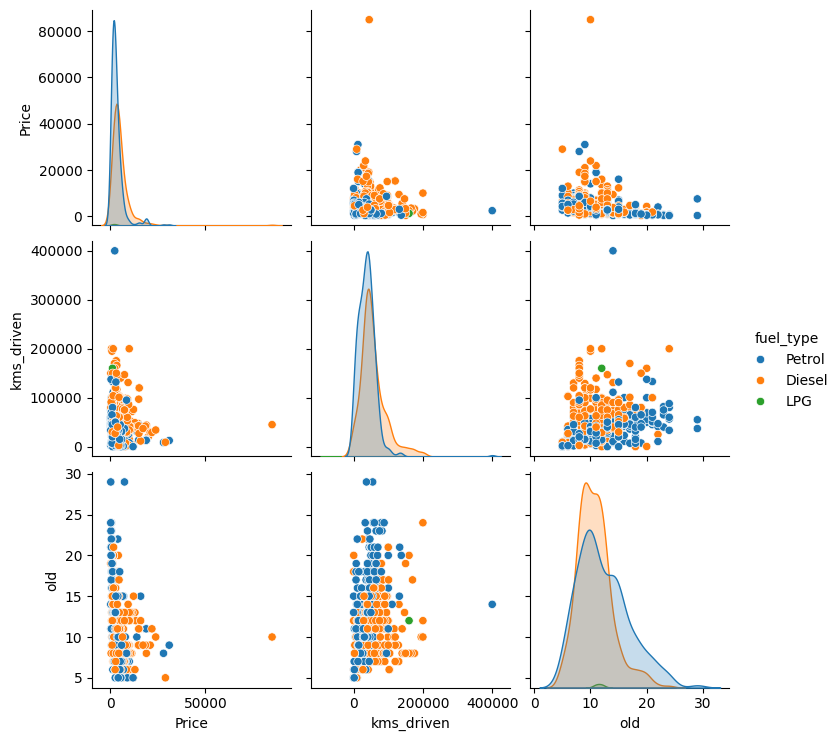

In [593]:
sns.pairplot(df, hue='fuel_type')

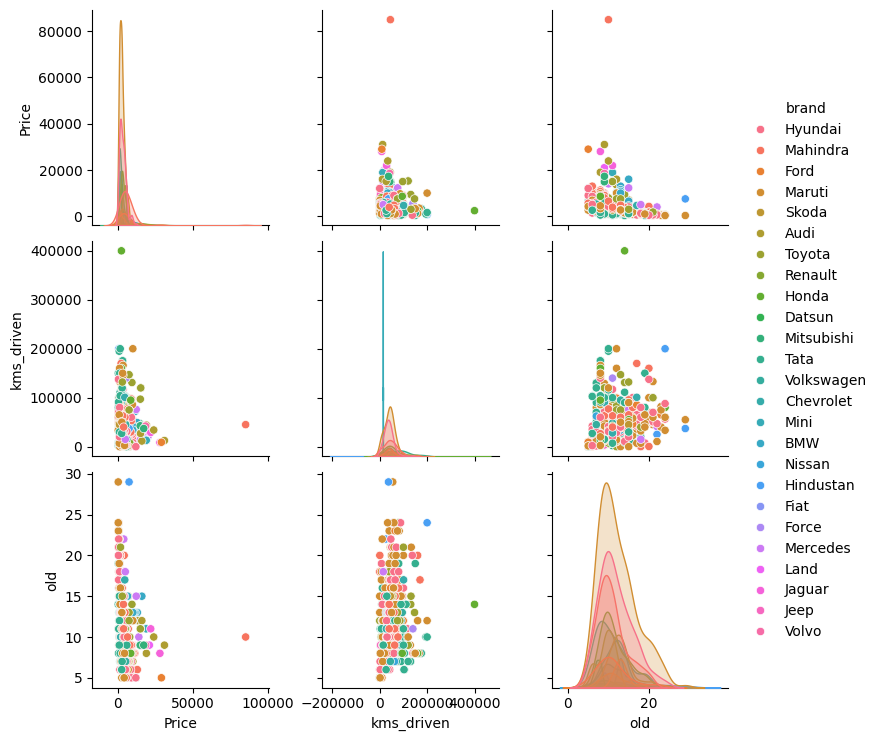

In [594]:
sns.pairplot(df, hue='brand')

In [595]:
df.corr(numeric_only=True)

,Price,kms_driven,old
Price,1.000,-0.121,-0.287
kms_driven,-0.121,1.000,0.234
old,-0.287,0.234,1.000


In [596]:
dummies = pd.get_dummies(df[['fuel_type', 'brand']], drop_first=True,dtype=int)
df = pd.concat([df, dummies], axis=1).drop(['fuel_type', 'brand'], axis=1)
df

,name,Price,kms_driven,old,fuel_type_LPG,fuel_type_Petrol,brand_BMW,brand_Chevrolet,brand_Datsun,brand_Fiat,brand_Force,brand_Ford,brand_Hindustan,brand_Honda,brand_Hyundai,brand_Jaguar,brand_Jeep,brand_Land,brand_Mahindra,brand_Maruti,brand_Mercedes,brand_Mini,brand_Mitsubishi,brand_Nissan,brand_Renault,brand_Skoda,brand_Tata,brand_Toyota,brand_Volkswagen,brand_Volvo
0,Hyundai Santro Xing XO eRLX Euro III,800,45000,17,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Mahindra Jeep CL550 MDI,4250,40,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,Hyundai Grand i10 Magna 1.2 Kappa VTVT,3250,28000,10,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Ford EcoSport Titanium 1.5L TDCi,5750,36000,10,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Ford Figo,1750,41000,12,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,Maruti Suzuki Ritz VXI ABS,2700,50000,13,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
812,Tata Indica V2 DLE BS III,1100,30000,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
813,Toyota Corolla Altis,3000,132000,15,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
814,Tata Zest XM Diesel,2600,27000,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


<Axes: >

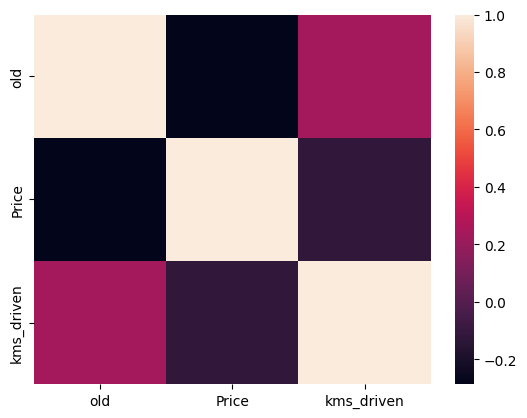

In [597]:
corr = df[['old', 'Price', 'kms_driven']]

sns.heatmap(corr.corr())

In [598]:
X = df.drop(columns=['Price','name'])

y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=667, )

In [599]:
def overfit_eval(model, X, y):

    """
    model: il nostro modello predittivo già addestrato
    X: una tupla contenente le prorietà del train set e test set (X_train, X_test)
    y: una tupla contenente target del train set e test set (y_train, y_test)
    """

    y_pred_train = model.predict(X[0])
    y_pred_test = model.predict(X[1])

    mse_train = mean_squared_error(y[0], y_pred_train)
    mse_test = mean_squared_error(y[1], y_pred_test)

    r2_train = r2_score(y[0], y_pred_train)
    r2_test = r2_score(y[1], y_pred_test)

    print("Train set:  MSE="+str(mse_train)+" R2="+str(r2_train))
    print("Test set:  MSE="+str(mse_test)+" R2="+str(r2_test))

In [600]:
alphas = [0.0001, 0.001, 0.01, 0.1 ,1 ,10]

for alpha in alphas:
    print("Lambda is: "+str(alpha))
    elastic = ElasticNet(alpha=alpha, l1_ratio=0.5)
    elastic.fit(X_train, y_train)
    overfit_eval(elastic, (X_train, X_test),(y_train, y_test))

Lambda is: 0.0001
Train set:  MSE=14739183.045196852 R2=0.43413138423687014
Test set:  MSE=6540325.499319912 R2=0.5460374849785671
Lambda is: 0.001
Train set:  MSE=14995033.068688773 R2=0.4243087571487618
Test set:  MSE=5790787.282918032 R2=0.5980627632094224
Lambda is: 0.01
Train set:  MSE=16898086.02793278 R2=0.35124650258084233
Test set:  MSE=5857278.401644651 R2=0.5934476296832909
Lambda is: 0.1
Train set:  MSE=20712152.42924076 R2=0.20481637356225113
Test set:  MSE=9371558.94458026 R2=0.3495222113034523
Lambda is: 1
Train set:  MSE=23055485.138683643 R2=0.11485084206035234
Test set:  MSE=11670999.13553515 R2=0.18991858724287758
Lambda is: 10
Train set:  MSE=24004595.43957842 R2=0.07841247702160115
Test set:  MSE=12486548.069037631 R2=0.13331152005419844


In [601]:
model = ElasticNet(alpha=0.001, l1_ratio=0.5)
model.fit(X_train, y_train)

ElasticNet(alpha=0.001)

In [602]:
y_pred = model.predict(X_test)

r2 = r2_score(y_test,y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print(f'R2: {r2}')
print(f'RMSE: {rmse:.2f}')

R2: 0.5980627632094224
RMSE: 2406.41


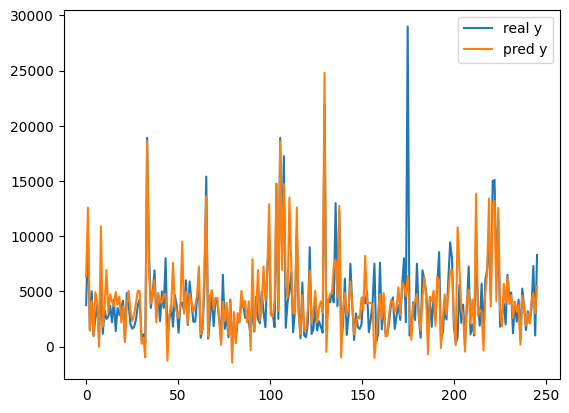

In [603]:
lenght = len(y_test)
x = np.linspace(0,lenght,lenght)

plt.plot(x, y_test, label = 'real y')
plt.plot(x, y_pred, label = 'pred y')
plt.legend()

In [604]:
import joblib

joblib.dump(model, 'linear_regression_model_car.pkl')

['linear_regression_model_car.pkl']